In [2]:
from datasets import load_dataset
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [9]:
df_DA_US = df_DA[df_DA['job_country'] == 'United States']
# Drop NAN values from the column for plotting
df_DA_US = df.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(50)

434736    200000.00000
362349    170000.00000
743217     58000.00000
34607     110000.00000
204181    212500.00000
635657    106830.00000
572812    350000.00000
508380     56700.00000
195476     99150.00000
478555     51014.00000
774700     52500.00000
219009    150000.00000
26106     155000.00000
401213    110000.00000
468158    133000.00000
534075    147500.00000
288147    199000.00000
770095     88128.00000
221651     66749.84375
311144     45000.00000
784191    217500.00000
148377     85000.00000
170250    197500.00000
612765     88300.00000
240816    175000.00000
623545     67500.00000
749098     99900.00000
400958    130000.00000
542956     96773.00000
146067    176500.00000
733216     80000.00000
48386      79930.00000
208265    171000.00000
725024     65000.00000
459518    184844.50000
389442    162500.00000
689829     65000.00000
165409    195500.00000
722312    137610.00000
36518      90000.00000
745190    206500.00000
443650    107937.00000
405307     85000.00000
578202    1

<Axes: >

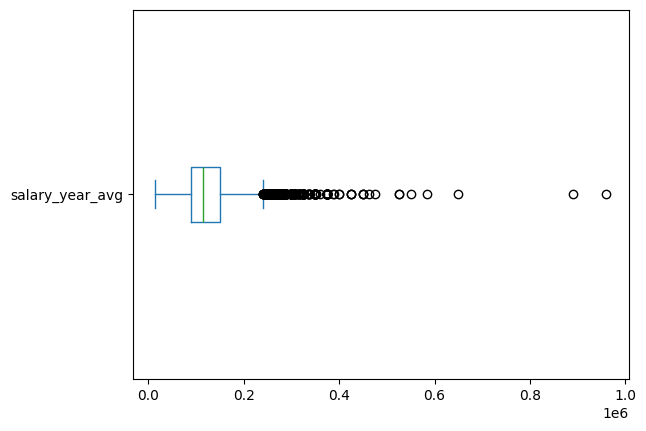

In [ ]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)


# Using Matplotlib

C:\Users\3D\AppData\Local\Temp\ipykernel_2824\2150149387.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False, patch_artist=True)


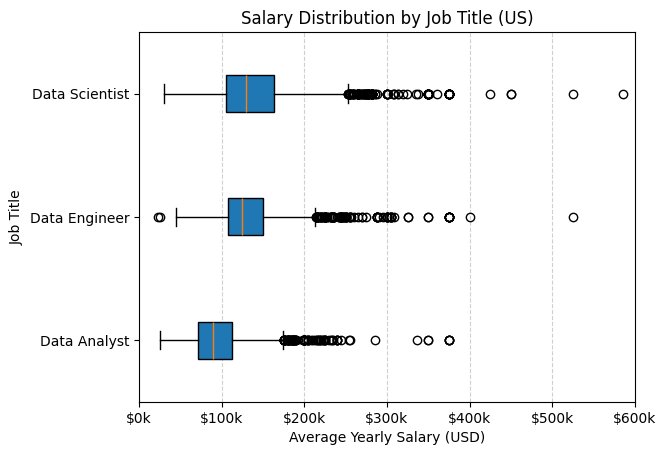

In [22]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#filter the data to appropriate job_state
#only get data job_titles jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False, patch_artist=True)
plt.title('Salary Distribution by Job Title (US)')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('Job Title')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, 600000)
ax = plt.gca()  #gca means get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.show()